In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from MCMC import MCMCModel
import itertools

In [3]:
t = np.linspace(0, 10, 100)

model = MCMCModel(t)

# true_a, true_v, _ = model.fit_with_noise(0, 10, -5, 5, 100, 0.1)

a_range = (-2, 2)
v_range = (-4, 4)
num_iterations = 10000
noise_amplitude = 0.001

samples = model.metropolis_hastings(a_range, v_range, num_iterations, noise_amplitude)

i = 0

for sample in samples:
    current_a, current_v = sample
    acceptance_status = "Accepted"
    
    if i > 0:
        previous_a, previous_v = samples[i - 1]
        
        if current_a == previous_a and current_v == previous_v:
            acceptance_status = "Rejected (same as previous)"

    print(f"Trial {i+1}: a = {current_a}, v = {current_v} ({acceptance_status})")
    
    i += 1

Trial 1: a = -1.4861803982114217, v = 2.7936781825640002 (Accepted)
Trial 2: a = -0.6566741921355868, v = -0.16635517902716845 (Accepted)
Trial 3: a = -1.1277843191144794, v = 0.49625509247040345 (Accepted)
Trial 4: a = 0.3084964171734983, v = -3.8892059171170796 (Accepted)
Trial 5: a = 0.6965539895249173, v = -1.7954950574052173 (Accepted)
Trial 6: a = 1.1093731241257427, v = -1.481511199772183 (Accepted)
Trial 7: a = 1.1093731241257427, v = -1.481511199772183 (Rejected (same as previous))
Trial 8: a = 1.1093731241257427, v = -1.481511199772183 (Rejected (same as previous))
Trial 9: a = 1.1093731241257427, v = -1.481511199772183 (Rejected (same as previous))
Trial 10: a = 1.1093731241257427, v = -1.481511199772183 (Rejected (same as previous))
Trial 11: a = 1.1093731241257427, v = -1.481511199772183 (Rejected (same as previous))
Trial 12: a = 1.1093731241257427, v = -1.481511199772183 (Rejected (same as previous))
Trial 13: a = 1.1093731241257427, v = -1.481511199772183 (Rejected (sam

In [11]:
samples_array = np.array(samples)
v_samples = samples_array[:,1]
a_samples = samples_array[:,0]

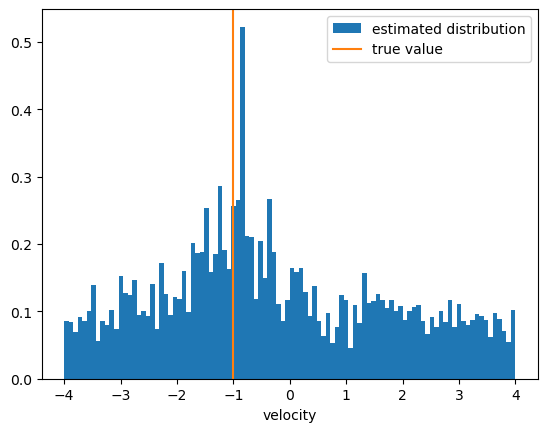

In [6]:
plt.hist(v_samples, 100, density=True, label = "estimated distribution")
plt.xlabel("velocity")
ylim = plt.ylim()
yx =plt.gca()
plt.plot([-1,-1], ylim, label = "true value")
yx.set_ylim(ylim)
plt.legend()

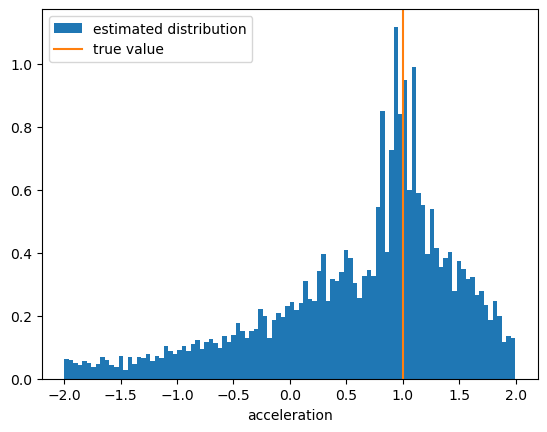

In [7]:
plt.hist(a_samples, 100, density=True, label = "estimated distribution")
plt.xlabel("acceleration")
ylim = plt.ylim()
ax = plt.gca()
plt.plot([1,1], ylim, label = "true value")
ax.set_ylim(ylim)
plt.legend()

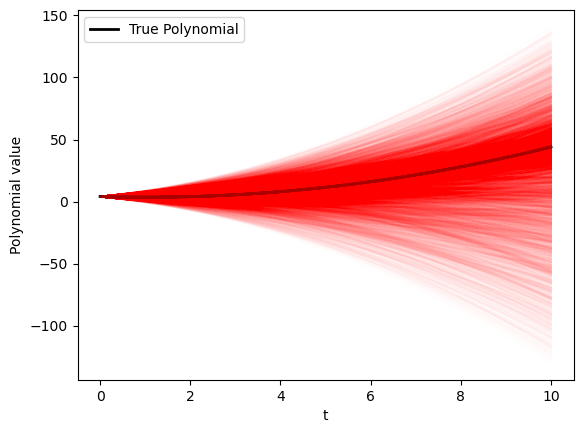

In [8]:
true_polynomial = model.polynomial(v=-1, a=1)
plt.plot(t, true_polynomial, label='True Polynomial', color='black', linewidth=2)

for sample in samples:
    current_a, current_v = sample
    plt.plot(t, model.polynomial(v=current_v, a=current_a), "r-", alpha=0.01)

plt.xlabel('t')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()


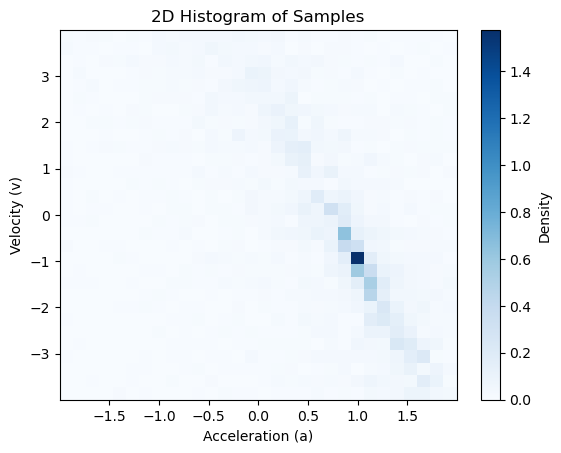

In [9]:
plt.figure()
plt.hist2d(a_samples, v_samples, bins=30, density=True, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Acceleration (a)')
plt.ylabel('Velocity (v)')
plt.title('2D Histogram of Samples')
plt.show()

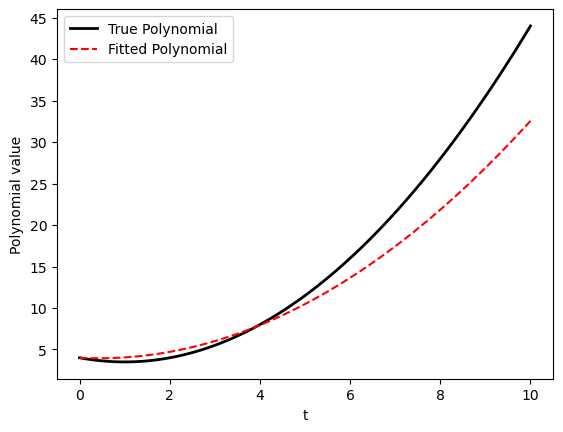

In [10]:
all_t = np.tile(t, len(samples))
all_f = np.hstack([model.polynomial(v=sample[1], a=sample[0]) for sample in samples])
degree = 3
fitted_poly = Polynomial.fit(all_t, all_f, degree)

'''
Creating all_t with np.tile(t, len(samples)):

np.tile(t, len(samples)) repeats the array t (which represents the time points) len(samples) times.
This creates a long array where the time points are repeated for each sample.
For example, if t = [0, 1, 2] and len(samples) = 3, then np.tile(t, 3) results in [0, 1, 2, 0, 1, 2, 0, 1, 2].
Creating all_f with np.hstack([model.polynomial(v=sample[1], a=sample[0]) for sample in samples]):

This list comprehension generates the polynomial values for each sample's (a, v) parameters.
model.polynomial(v=sample[1], a=sample[0]) computes the polynomial values for a given a and v sample.
np.hstack(...) concatenates these polynomial values into a single long array.
For example, if model.polynomial(v, a) returns [y0, y1, y2] for each sample, and there are three samples, then np.hstack(...) results in [y0_1, y1_1, y2_1, y0_2, y1_2, y2_2, y0_3, y1_3, y2_3].
Fitting a polynomial with Polynomial.fit(all_t, all_f, degree):

Polynomial.fit(all_t, all_f, degree) fits a polynomial of a specified degree to the data points (all_t, all_f).
all_t represents the combined time points for all samples.
all_f represents the combined polynomial values for all samples.
The function returns a fitted polynomial that best matches the data.
'''

plt.plot(t, true_polynomial, label='True Polynomial', color='black', linewidth=2)
plt.plot(t, fitted_poly(t), label='Fitted Polynomial', color='red', linestyle='--')
plt.xlabel('t')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()

In [14]:
f_uber = []
t_uber = []
for a,v in itertools.zip_longest(a_samples, v_samples):
    f = model.polynomial(v,a)
    f_uber.append(f)
    t_uber.append(model.t)

In [20]:
t_uber = np.array(t_uber)
t_uber = t_uber.flatten()

f_uber = np.array(f_uber)
f_uber = f_uber.flatten()

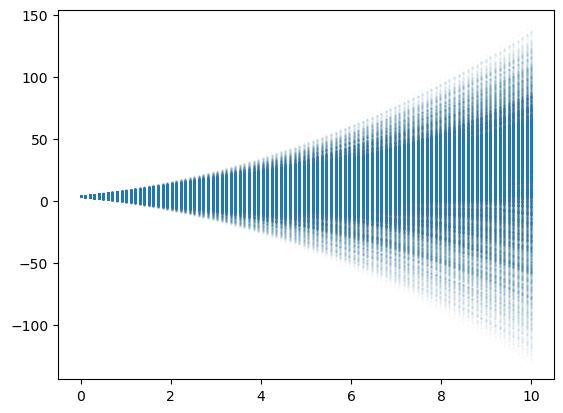

In [22]:
plt.scatter(t_uber, f_uber, s=1, alpha=0.02)

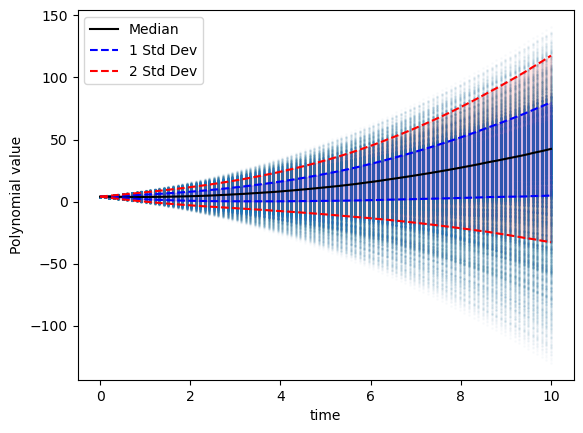

In [28]:
f_uber_reshaped = f_uber.reshape(len(a_samples), -1)
mean_vals = np.mean(f_uber_reshaped, axis=0)
median_vals = np.median(f_uber_reshaped, axis=0)
std_dev = np.std(f_uber_reshaped, axis=0)

plt.figure()
plt.scatter(t_uber, f_uber, s=1, alpha=0.02)

plt.plot(model.t, median_vals, color='black', label='Median')

plt.plot(model.t, median_vals + std_dev, color='blue', linestyle='--', label='1 Std Dev')
plt.plot(model.t, median_vals - std_dev, color='blue', linestyle='--')
plt.plot(model.t, median_vals + 2 * std_dev, color='red', linestyle='--', label='2 Std Dev')
plt.plot(model.t, median_vals - 2 * std_dev, color='red', linestyle='--')

plt.fill_between(model.t, median_vals - std_dev, median_vals + std_dev, color='blue', alpha=0.2)
plt.fill_between(model.t, median_vals - 2 * std_dev, median_vals + 2 * std_dev, color='red', alpha=0.1)

plt.xlabel('time')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()

In [1]:
import numpy as np
import functools

class MCMCModel:
    def __init__(self, function, param_ranges: np.ndarray, function_kwargs: dict = None):
        self.function = function
        self.param_ranges = param_ranges
        self.function_kwargs = function_kwargs
    
    def generate_noise(self, data, noise_amp=1.0):
        """
        Generates noisy data by adding random noise.

        Args:
        - x: numpy array of true values
        - A: amplitude of noise

        Returns:
        - numpy array of noisy data
        """
        noise = 2 * noise_amp * np.random.random(size=len(data)) - noise_amp
        return data + noise

    def compute_rms(self, observed, predicted):
        diff = observed - predicted
        return np.sqrt(np.mean(diff**2))

    def guess_params(self):
        return np.random.uniform(low=self.param_ranges[:,0], high=self.param_ranges[:,1], size=len(self.param_ranges))
        
    def likelihood(self, noisy_vals, params, tol=1e-9):
        trial_vals = eval(self.function.__name__)(*params, **self.function_kwargs)
        rms_error = self.compute_rms(noisy_vals, trial_vals)
        likelihood = 1 / (rms_error + tol) 
        return likelihood

    def metropolis_hastings(self, data, num_iterations, noise_amplitude=1.0):
        noisy_vals = self.generate_noise(data, noise_amplitude)

        current_params = self.guess_params()

        current_likelihood = self.likelihood(noisy_vals, current_params)

        samples = np.zeros(shape=(num_iterations, len(self.param_ranges)))
        samples[0] = current_params
        
        for i in range(1, num_iterations):
            proposed_params = self.guess_params()
            proposed_likelihood = self.likelihood(noisy_vals, proposed_params)

            acceptance_ratio = proposed_likelihood / current_likelihood
            if acceptance_ratio > np.random.uniform(0.7, 1.0):
                current_params = proposed_params
                current_likelihood = proposed_likelihood

            samples[i] = current_params

        return samples
    
    def thin_samples(self, samples, thin_ratio: float = 0.2, cutoff_start: int = 0):
        cutoff = samples[cutoff_start:]
        thinned = np.zeros_like(cutoff)
        i = 0
        mod = int(1/thin_ratio)
        for j in range(cutoff.size):
            if j % mod == 0:
                thinned[i] = cutoff[j]
                i += 1
        return np.trim_zeros(thinned)
    
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from wave_func import mcmc_wave
    REAL_AMPLITUDE = 6.0
    REAL_DAMPING = 0.3
    REAL_OMEGA = 2.0
    REAL_PHASE = 0.0
    NOISE_AMPLITUDE = 4.0
    NUM_ITERATIONS = 100000
    DATA_STEPS = 10000
    THIN_RATIO = 0.1
    
    time, real_wave = mcmc_wave(REAL_AMPLITUDE, REAL_DAMPING, REAL_OMEGA, steps=DATA_STEPS, return_time=True)
    
    ranges = np.array(
        [
            [0.1, 10.0],    # amplitude (A) range
            [0.1, 3.0],     # damping (b) range
            [0.1, 10.0],    # angular frequency (omega) range
            # [0.0, 2*np.pi]  # phase constant range
        ]
    )
    kwargs = {"seconds": 30.0, "steps": DATA_STEPS, "return_time": False}

    model = MCMCModel(function=mcmc_wave, param_ranges=ranges, function_kwargs=kwargs)
    samples = model.metropolis_hastings(real_wave, NUM_ITERATIONS, NOISE_AMPLITUDE)
    noise = model.generate_noise(real_wave, noise_amp=NOISE_AMPLITUDE)

    for i, sample in enumerate(samples):
        current_params = sample
        acceptance_status = "Accepted"
        
        if i > 0:
            previous_params = samples[i - 1]
            
            if np.all(current_params == previous_params):
                acceptance_status = "Rejected (same as previous)"

        print(f"Trial {i+1}: ({acceptance_status})\n{current_params}")
    
    amplitude_samples = samples[:, 0]
    damping_samples = samples[:, 1]
    angular_freq_samples = samples[:, 2]
    # phase_samples = samples[:, 3]
    
    amplitude_samples = model.thin_samples(amplitude_samples, thin_ratio=THIN_RATIO, cutoff_start=int(NUM_ITERATIONS/10))
    damping_samples = model.thin_samples(damping_samples, thin_ratio=THIN_RATIO, cutoff_start=int(NUM_ITERATIONS/10))
    angular_freq_samples = model.thin_samples(angular_freq_samples, thin_ratio=THIN_RATIO, cutoff_start=int(NUM_ITERATIONS/10))
    
    mean_amplitude = np.mean(amplitude_samples)
    mean_damping = np.mean(damping_samples)
    mean_omega = np.mean(angular_freq_samples)
    
    result_wave = mcmc_wave(mean_amplitude, mean_damping, mean_omega, steps=DATA_STEPS)

    figure = plt.figure(figsize=(13, 7), layout="constrained")
    figure.suptitle("Extracting Signal Parameters From Noise")
    axes = figure.subplot_mosaic(
    """
    WWN.
    ABF.
    """,
    width_ratios=[1, 1, 1, 0.05]
    )
    
    axes["A"].hist(amplitude_samples, bins=100, density=True, label="estimated distribution")
    axes["A"].set_xlabel("Amplitude")
    ylim = axes["A"].get_ylim()
    axes["A"].plot([REAL_AMPLITUDE, REAL_AMPLITUDE], [0.0, ylim[1]], label="true value")
    axes["A"].plot([mean_amplitude, mean_amplitude], [0.0, ylim[1]], label="sample mean")
    axes["A"].legend(prop={"size": 8})
    
    axes["B"].hist(damping_samples, bins=100, density=True, label="estimated distribution")
    axes["B"].set_xlabel("Damping")
    ylim = axes["B"].get_ylim()
    axes["B"].plot([REAL_DAMPING, REAL_DAMPING], [0.0, ylim[1]], label = "true value")
    axes["B"].plot([mean_damping, mean_damping], [0.0, ylim[1]], label="sample mean")
    axes["B"].legend(prop={"size": 8})
    
    axes["F"].hist(angular_freq_samples, bins=100, density=True, label="estimated distribution")
    axes["F"].set_xlabel("Angular frequency")
    ylim = axes["F"].get_ylim()
    axes["F"].plot([REAL_OMEGA, REAL_OMEGA], [0.0, ylim[1]], label = "true value")
    axes["F"].plot([mean_omega, mean_omega], [0.0, ylim[1]], label="sample mean")
    axes["F"].legend(prop={"size": 8})
    
    # axes["P"].hist(phase_samples, bins=100, density=True, label="estimated distribution")
    # axes["P"].set_xlabel("phase constant")
    # axes["P"].plot([REAL_PHASE, REAL_PHASE], [0.0, 1.0], label = "true value")
    # axes["P"].legend()
        
    axes["W"].plot(time, real_wave, "r", label="real")
    axes["W"].set_xlabel("time")
    axes["W"].annotate(f"Real Parameters:\nAmplitude: {REAL_AMPLITUDE}\nDamping: {REAL_DAMPING}\nAngular Frequency: {REAL_OMEGA}", xy=(0.75, 0.1), xycoords="axes fraction")
    axes["W"].plot(time, result_wave, "g", label="generated")
    axes["W"].legend()
    
    axes["N"].plot(time, noise)
    axes["N"].set_xlabel("time")
    axes["N"].annotate(f"Noise amplitude: {NOISE_AMPLITUDE}", xy=(0.3, 0.9), xycoords="axes fraction")

    plt.show()
    
    
    

ModuleNotFoundError: No module named 'wave_func'